# Week 7: Tennis Data Exploration

In [1]:
%pylab
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import colors
import seaborn as sns

data = pd.read_csv("tennis.csv").drop_duplicates()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
def background_gradient(s, m, M, cmap='Wistia', low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

data.corr().style.apply(background_gradient,
               cmap='Wistia',
               m=data.corr().min().min(),
               M=data.corr().max().max()
)

## Relationship between age and points

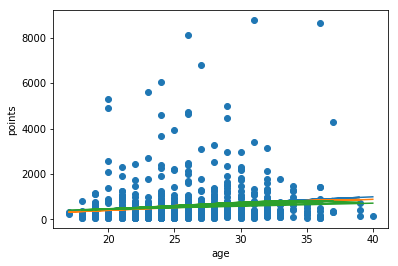

In [3]:
# Extract Series for age and points
x = data["age"]
y = data["points"]
# Scatter plot data
plt.scatter(x, y)
plt.xlabel("age")
plt.ylabel("points")
# Plot lines of best fit
p1 = poly1d(polyfit(x, y, 1))
p2 = poly1d(polyfit(x, y, 2))
p3 = poly1d(polyfit(x, y, 3))
xu = x.unique()
plot(xu, p1(xu), xu, p2(xu), xu, p3(xu))

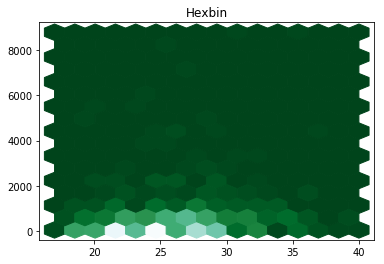

In [4]:
nbins = 15
title('Hexbin')
hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)

Text(0,0.5,'points')

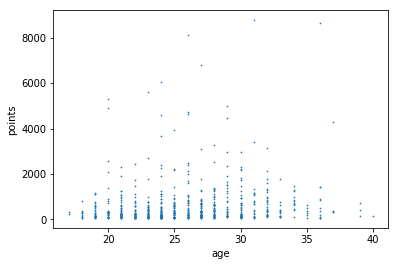

In [5]:
plot(x, y, linestyle='', marker='o', markersize=0.7)
xlabel("age")
ylabel("points")

## Visual Exploration
Here we will use visualisation methods to form an intuitive understanding of the relationships we are investigating.

In [6]:
# Separate data by gender
data_male = data.loc[data["gender"] == "M"]
data_female = data.loc[data["gender"] == "F"]

Text(0.5,1,'Scatter plots of Points vs Height')

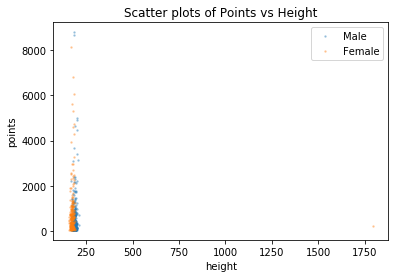

In [7]:
plot("height", "points", data=data_male, linestyle='', marker='o', markersize=1.5, alpha=0.3, label="Male")
plot("height", "points", data=data_female, linestyle='', marker='o', markersize=1.5, alpha=0.3, label="Female")
xlabel("height")
ylabel("points")
legend()
plt.title("Scatter plots of Points vs Height")

Text(0.5,1,'Scatter plots of Points vs Height')

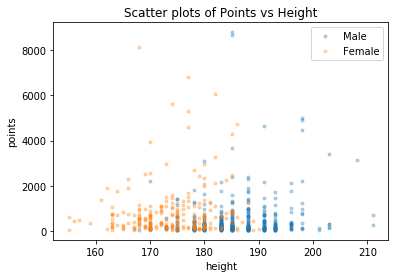

In [8]:
# TODO: remove the outliers
data_female_clean = data_female[np.abs(data_female.height-data_female.height.mean())<=(3*data_female.height.std())]

plot("height", "points", data=data_male, linestyle='', marker='o', markersize=3, alpha=0.3, label="Male")
plot("height", "points", data=data_female_clean, linestyle='', marker='o', markersize=3, alpha=0.3, label="Female")
xlabel("height")
ylabel("points")
legend()
plt.title("Scatter plots of Points vs Height")

Text(0.5,1,'Scatter plots of Height vs Ranking')

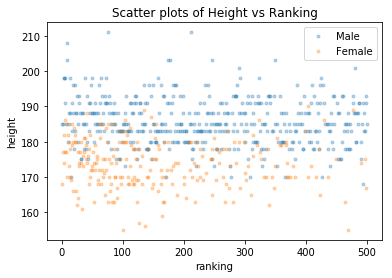

In [9]:
plot("ranking", "height", data=data_male, linestyle='', marker='o', markersize=3, alpha=0.3, label="Male")
plot("ranking", "height", data=data_female_clean, linestyle='', marker='o', markersize=3, alpha=0.3, label="Female")
xlabel("ranking")
ylabel("height")
legend()
plt.title("Scatter plots of Height vs Ranking")

### Handedness exploration

In [10]:
print("P(R|M) =", (data_male["hand"] == "R").mean())
print("P(L|M) =", (data_male["hand"] == "L").mean())
print("P(R|F) =", (data_female["hand"] == "R").mean())
print("P(L|F) =", (data_female["hand"] == "L").mean())

P(R|M) = 0.8728070175438597
P(L|M) = 0.125
P(R|F) = 0.9224489795918367
P(L|F) = 0.07755102040816327


In [11]:
len(data_female) * 0.077551

18.999995

In [12]:
data_right = data.loc[data["hand"] == "R"]
data_left = data.loc[data["hand"] == "L"]

Text(0.5,1,'P(points)')

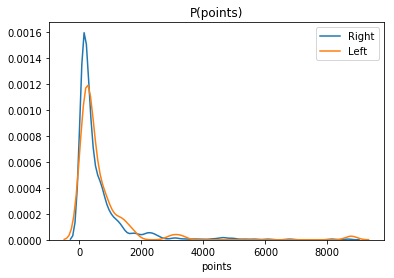

In [13]:
sns.distplot(data_right["points"], kde=True, hist=False, label="Right")
sns.distplot(data_left["points"], kde=True, hist=False, label="Left")
title("P(points)")

In [14]:
data_right_male   = data_right.loc[data_right["gender"] == "M"]
data_right_female = data_right.loc[data_right["gender"] == "F"]
data_left_male    = data_left.loc[data_left["gender"] == "M"]
data_left_female  = data_left.loc[data_left["gender"] == "F"]

Text(0.5,1,'P(points|female)')

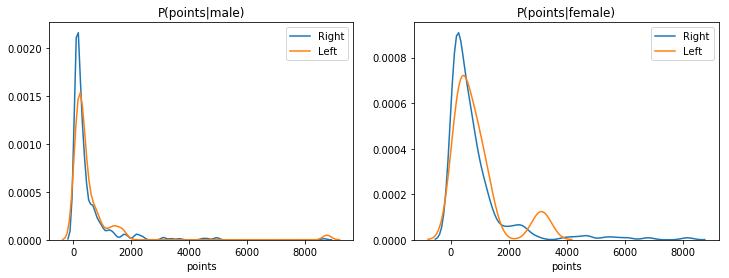

In [15]:
figsize(12,4)
subplot(121)
sns.distplot(data_right_male["points"], kde=True, hist=False, label="Right")
sns.distplot(data_left_male["points"], kde=True, hist=False, label="Left")
title("P(points|male)")

subplot(122)
sns.distplot(data_right_female["points"], kde=True, hist=False, label="Right")
sns.distplot(data_left_female["points"], kde=True, hist=False, label="Left")
title("P(points|female)")

### Handedness exploration

In [16]:
male_mean = data.loc[data["gender"] == "M"]["height"].mean()
print("Average height of men:", male_mean)
female_mean = data.loc[data["gender"] == "F"]["height"].mean()
print("Average height of women:", female_mean)

Average height of men: 185.64912280701753
Average height of women: 180.37142857142857


In [17]:
print("Average rank of male tall players:", data.loc[np.logical_and(data["gender"] == "M", data["height"] >= male_mean)]["ranking"].mean())
print("Average score of male tall players:", data.loc[np.logical_and(data["gender"] == "M", data["height"] >= male_mean)]["points"].mean())
print("\nAverage rank of male short players:", data.loc[np.logical_and(data["gender"] == "M", data["height"] < male_mean)]["ranking"].mean())
print("Average score of male short players:", data.loc[np.logical_and(data["gender"] == "M", data["height"] < male_mean)]["points"].mean())

Average rank of male tall players: 225.68085106382978
Average score of male tall players: 576.7287234042553

Average rank of male short players: 247.57835820895522
Average score of male short players: 438.2910447761194


In [18]:
print("Average rank of female tall players:", data.loc[np.logical_and(data["gender"] == "F", data["height"] >= male_mean)]["ranking"].mean())
print("Average score of female tall players:", data.loc[np.logical_and(data["gender"] == "F", data["height"] >= male_mean)]["points"].mean())
print("\nAverage rank of female short players:", data.loc[np.logical_and(data["gender"] == "F", data["height"] < male_mean)]["ranking"].mean())
print("Average score of female short players:", data.loc[np.logical_and(data["gender"] == "F", data["height"] < male_mean)]["points"].mean())

Average rank of female tall players: 230.8
Average score of female tall players: 811.5

Average rank of female short players: 161.46808510638297
Average score of female short players: 835.7787234042553


In [19]:
scores_men_tall = data.loc[np.logical_and(data["gender"] == "M", data["height"] >= male_mean)]["points"]
scores_men_short = data.loc[np.logical_and(data["gender"] == "M", data["height"] < male_mean)]["points"]
t, p = stats.ttest_ind(scores_men_tall, scores_men_short)
p = p/2 # Because 1 tailed T-Test
print("T score: %f, P score: %f" % (t, p))

T score: 1.711723, P score: 0.043815


In [20]:
scores_women_tall = data.loc[np.logical_and(data["gender"] == "F", data["height"] >= female_mean)]["points"]
scores_women_short = data.loc[np.logical_and(data["gender"] == "F", data["height"] < female_mean)]["points"]
t, p = stats.ttest_ind(scores_women_tall, scores_women_short)
p = p/2 # Because 1 tailed T-Test
print("T score: %f, P score: %f" % (t, p))

T score: 1.860241, P score: 0.032030


In [21]:
# Calculate observations
minR = data["ranking"].min()
maxR = data["ranking"].max()
minH = {}
maxH = {}
minH['M'] = data_male["height"].min()
maxH['M'] = data_male["height"].max()
minH['F'] = data_female_clean["height"].min()
maxH['F'] = data_female_clean["height"].max()
rank_groups = 5
height_groups = 2
genders = ["M", "F"]
incr_rank = (maxR - minR)/rank_groups
incr_height = {'M': (maxH['M'] - minH['M'])/height_groups, 'F': (maxH['F'] - minH['F'])/height_groups }

obs_data = []
for i in range(rank_groups):
    row = []
    ranklb = minR+i*incr_rank
    rankub = minR+(i+1)*incr_rank
    for g in genders:
        if g == 'M':
            cur = data_male
        else:
            cur = data_female_clean
        for j in range(height_groups):
            heightlb = minH[g]+j*incr_height[g]
            heightub = minH[g]+(j+1)*incr_height[g]
            row.append(
                len( cur.loc[np.logical_and(
                    np.logical_and(cur["ranking"] >= ranklb, cur["ranking"] < rankub),
                    np.logical_and(cur["height"] >= heightlb, cur["height"] < heightub)
                )] )
            )
            
    obs_data.append(row)
    
    
observations = pd.DataFrame(
    data = obs_data,
    columns=[ "M: %d - %d" % (minH['M']+j*incr_height['M'], minH['M']+(j+1)*incr_height['M']-1) for j in range(height_groups)]
    + [ "F: %d - %d" % (minH['F']+j*incr_height['F'], minH['F']+(j+1)*incr_height['F']-1) for j in range(height_groups)],
    index=[ "%d - %d" % (minR + i*incr_rank, minR + (i+1)*incr_rank -1) for i in range(rank_groups)]
)
observations

M: 168 - 188  M: 189 - 210  F: 155 - 171  F: 172 - 189
1 - 99               67            32            38            60
100 - 199            69            30            31            32
200 - 299            75            17            18            22
300 - 399            61            21            11            17
400 - 499            59            22             7             7

In [22]:
exp_data = []
for i in range(rank_groups):
    row = []
    ranklb = minR+i*incr_rank
    rankub = minR+(i+1)*incr_rank
    for g in genders:
        if g == 'M':
            cur = data_male
        else:
            cur = data_female_clean
        gnr = len ( cur )
        for j in range(height_groups):
            heightlb = minH[g]+j*incr_height[g]
            heightub = minH[g]+(j+1)*incr_height[g]
            rank_group = len( cur.loc[np.logical_and(cur["ranking"] >= ranklb, cur["ranking"] < rankub)] )
            height_group = len( cur.loc[np.logical_and(cur["height"] >= heightlb, cur["height"] < heightub)] )
            row.append( gnr * (rank_group/gnr) * (height_group/gnr) )
            
    exp_data.append(row)

expected = pd.DataFrame(
    data = exp_data,
    columns=[ "M: %d - %d" % (minH['M']+j*incr_height['M'], minH['M']+(j+1)*incr_height['M']-1) for j in range(height_groups)]
    + [ "F: %d - %d" % (minH['F']+j*incr_height['F'], minH['F']+(j+1)*incr_height['F']-1) for j in range(height_groups)],
    index=[ "%d - %d" % (minR + i*incr_rank, minR + (i+1)*incr_rank -1) for i in range(rank_groups)]
)
expected

M: 168 - 188  M: 189 - 210  F: 155 - 171  F: 172 - 189
1 - 99        72.807018     26.754386     42.172131     55.426230
100 - 199     72.078947     26.486842     27.110656     35.631148
200 - 299     67.710526     24.881579     17.213115     22.622951
300 - 399     59.701754     21.938596     12.049180     15.836066
400 - 499     58.973684     21.671053      6.454918      8.483607

In [23]:
stat_height = stats.chisquare([item for sublist in observations.values for item in sublist], [item for sublist in expected.values for item in sublist]).statistic
stat_height

7.697606186049128

In [24]:
stats.distributions.chi2.sf(stat_height, 12)

0.8082925814979871

# Being left-handed is an advantage

Initial investigation using simple data aggragation showed that left handed players hold higher ranks within the tennis board and on average they have more points than right handed players:

In [25]:
print("Average rank of right-handed players:", data.loc[data["hand"] == "R"]["ranking"].mean())
print("Average score of right-handed players:", data.loc[data["hand"] == "R"]["points"].mean())
print("\nAverage rank of left-handed players:", data.loc[data["hand"] == "L"]["ranking"].mean())
print("Average score of left-handed players:", data.loc[data["hand"] == "L"]["points"].mean())

Average rank of right-handed players: 215.72115384615384
Average score of right-handed players: 608.775641025641

Average rank of left-handed players: 186.56578947368422
Average score of left-handed players: 662.0263157894736


To investigate if left handed players have a significant advantage, we conduct a T-Test.

In [26]:
scoresL = data.loc[data["hand"] == "L"]["points"]
scoresR = data.loc[data["hand"] == "R"]["points"]
t, p = stats.ttest_ind(scoresL, scoresR)
p = p/2 # Because 1 tailed T-Test
print("T score: %f, P score: %f" % (t, p))

T score: 0.451694, P score: 0.325815


In [27]:
# Calculate observations
minR = data["ranking"].min()
maxR = data["ranking"].max()
groups = 5
incr = (maxR - minR)/groups
observations = pd.DataFrame(
    data = [
        [ len( data.loc[np.logical_and(np.logical_and(data["hand"] == "L", data["ranking"] >= minR+i*incr), data["ranking"] < minR+(i+1)*incr)] ) for i in range(groups) ],
        [ len( data.loc[np.logical_and(np.logical_and(data["hand"] == "R", data["ranking"] >= i*incr), data["ranking"] < (i+1)*incr)] ) for i in range(groups)]
    ],
    columns=[ "%d - %d" % (minR + i*incr, minR + (i+1)*incr -1) for i in range(groups)],
    index=["L", "R"]
)
observations

1 - 99  100 - 199  200 - 299  300 - 399  400 - 499
L      22         23         17          6          8
R     174        139        117        105         88

In [28]:
# Calculate expected values
lh_prod = float(len(data.loc[data["hand"] == "L"])) / len(data)
group_nrs = [ len(data.loc[np.logical_and(data["ranking"] >= minR + i*incr, data["ranking"] < minR + (i+1)*incr)]) for i in range(groups)]
expected = pd.DataFrame(
    data = [[ lh_prod*group_nrs[i] for i in range(groups) ], [ (1-lh_prod)*group_nrs[i] for i in range(groups) ]],
    columns=[ "%d - %d" % (minR + i*incr, minR + (i+1)*incr -1) for i in range(groups)],
    index=["L", "R"]
)
expected

1 - 99   100 - 199   200 - 299  300 - 399  400 - 499
L   21.466476   17.563481   14.527817   11.92582  10.407989
R  176.533524  144.436519  119.472183   98.07418  85.592011

In [29]:
# Chi Square test
stat_hand = stats.chisquare([item for sublist in observations.values for item in sublist], [item for sublist in expected.values for item in sublist]).statistic
stat_hand

6.467312944404331

In [30]:
stats.distributions.chi2.sf(stat_hand, 4)

0.1668616190847413

Our $t$-Test reveals a $p$-score of $0.325815$. Generally we reject our null-hypothesis when this score is less that $0.05$. From our data we can thus not conclude that left-handed players have a significant advantage over right-handed players.

# Resources

Links to the converters:
- https://surfstat.anu.edu.au/surfstat-home/tables/t.php
- http://www.socscistatistics.com/pvalues/tdistribution.aspx
- https://goodcalculators.com/student-t-value-calculator/